# nlC3 Color Analysis Examples
* __Parametric Difference Equation imaging methods__ _in the context of the Escape Time Algorithm_
    * grayscale
    * map directly to HSV
    * color-map to RGB
    
#### Equation Definition Code:

In [ ]:
import cmath

In [2]:
""" get the external code files"""
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

""" known parameter sets  """
# tsty_64 = np.array([0.161145800333, 0.370248409961, 0.119609846764], dtype=complex)
tsty_64 = np.array([0.161145800333, 0.370248409961, 0.119609846764])
tsty_33 = [-0.112413777603, -0.350438576801, 0.377731470314]
tsty_61 = [-0.107692385723, 1.539081783286, 0.584733068445]
tsty_62 = [-1.077419657727, 1.079694186592, 0.567453371505]
tsty_66 = [0.106699281931,-1.446300888486, 0.763588120232]
tsty_77 = [0.046632473878, 0.223406467719, 1.386264134664]
tsty_87 = [0.830928213916, 2.171631574827, -0.651878138495]
""" define the equation """
def nlC3(Z, p, Z0=None, ET=None):
    """ 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    # Z = Z^(2*Z^(-c(1)^(Z^-c(2))^(Z^-c(3))));
    Z = Z**(2*Z**(-p[0]**( Z**-p[1] )**( Z**-p[2] )  ))
    return Z

### ! MATLAB vs Python -- implausible complex number differences !

In [3]:
Z = 1 + 1j
print(Z)
p = tsty_64
print(nlC3(Z, p))
print('MATLAB = 0.3485 + 2.7781i')

# -c(3) = -0.119610 
# Z^-c(3) =   0.9552 - 0.0900i

# -c(2) = -0.370248 
# Z^-c(2) =   0.8426 - 0.2522i

(1+1j)
(0.416528044205+2.61675511563j)
MATLAB = 0.3485 + 2.7781i


# Products of Escape Time Algorithm
* ET, Z, Z0 = get_primitives( [ (function-name, function-parameters ) ], complex_plane_definition)
    * Z0  = initial complex vector at each point (on the complex plane == the input image)
    * ET  = Escape Time at each point
    * Z   = final complex vector at each point

In [21]:
""" Define a complex plane point for each pixel """
par_set = {'n_rows': 700, 'n_cols': 500}
par_set['center_point'] = 0.0 + 0.0*1j
par_set['theta'] = np.pi / 2
par_set['zoom'] = 3/4

par_set['it_max'] = 64
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

""" Define the function handle and numerical parameter set """
list_tuple = [(nlC3, (tsty_66))]
t0 = time.time()

""" Get the primitive products of the calculation """
ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t calculate primitives total time')

4.480283975601196 	 calculate primitives total time


# Normalized number planes for use as image color values
* Zd, Zr, ETn = etg_norm(Z0, Z, ET)
    * Zd  = distance at ET
    * Zr  = rotation at ET
    * ETn = ET

In [22]:
""" Normalize """
t0 = time.time()
Zd_sm, Zr_sm, ETn_sm = ncp.etg_norm(Z0_sm, Z_sm, ET_sm)
print(time.time() - t0, '\t normalize primitives to color values')

0.6954200267791748 	 normalize primitives to color values


# Grayscale
* D = mat_to_gray(Zd, max_v=255, min_v=64)
    * normalized number plane
    * (optional) grascale parameters

1.9293320178985596 	 grayscale converstion time


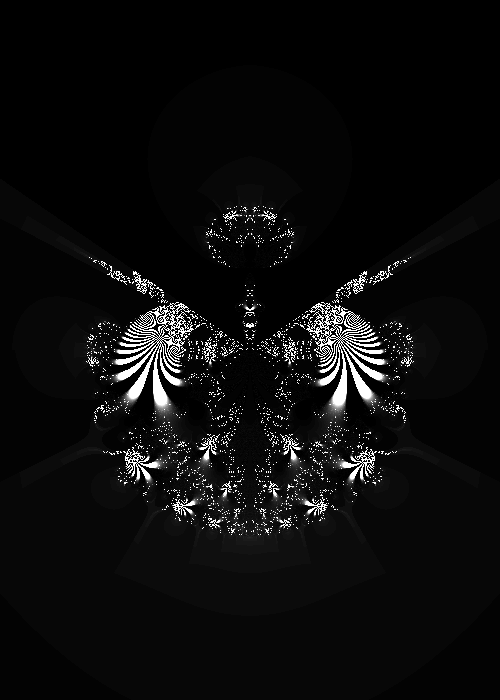

In [23]:
""" Number of iterations for each Vector at Escape Time as a full range grayscale  """
t0 = time.time()
ETd = ncp.mat_to_gray(ETn_sm)
print(time.time() - t0, '\t grayscale converstion time')
display(ETd)

1.9253160953521729 	 grayscale converstion time


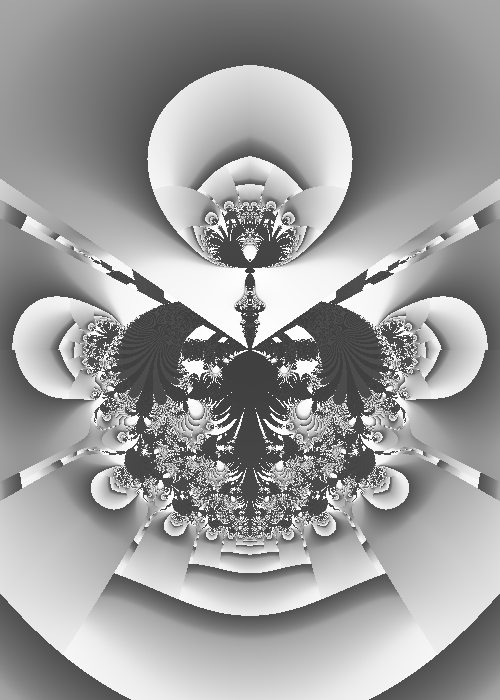

In [24]:
""" Vector Distance at Escape Time as a full range grayscale  """
t0 = time.time()
D = ncp.mat_to_gray(Zd_sm, max_v=255, min_v=64)
print(time.time() - t0, '\t grayscale converstion time')
display(D)

2.0055041313171387 	 grayscale converstion time


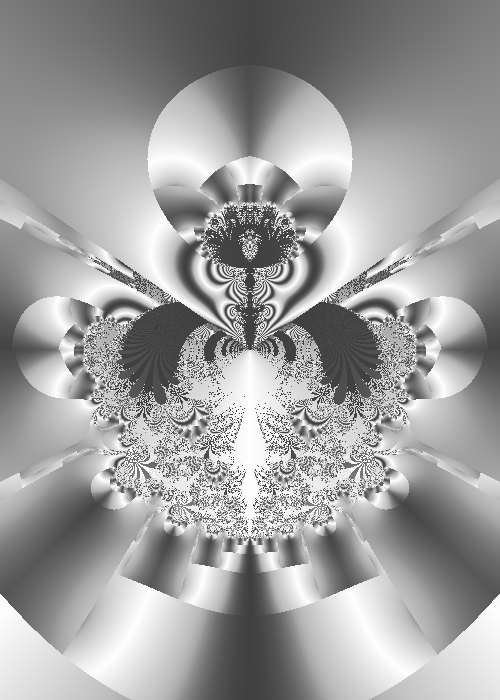

In [25]:
""" Vector Rotation at Escape Time as a full range grayscale  """
t0 = time.time()
R = ncp.mat_to_gray(Zr_sm, max_v=255, min_v=64)
print(time.time() - t0, '\t grayscale converstion time')
display(R)

# Hue Saturation Value: HSV direct
* Ihsv = rgb_2_hsv_mat(H, S, V)
    * H = ncp.range_norm(Zr - Zd, lo=0.5, hi=0.85)
    * S = ncp.range_norm(1 - ETn, lo=0.0, hi=0.9)
    * V = ncp.range_norm(ETn, lo=0.0, hi=1.0)

4.776678085327148 	 HSV converstion time


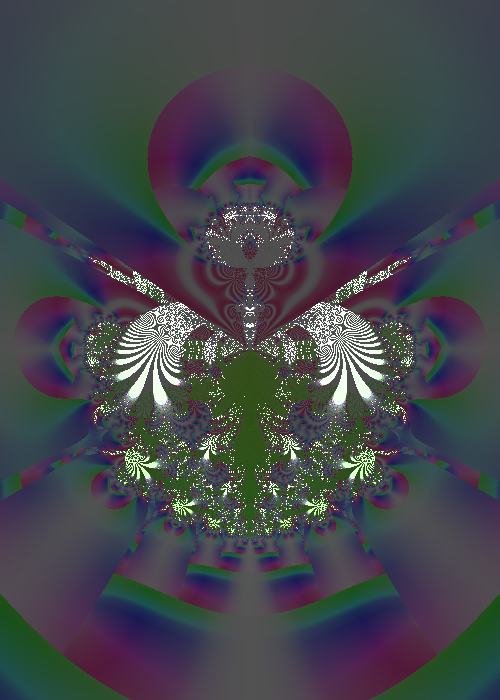

In [26]:
""" number one of two functions 
    (both examples using Distance, Rotation and ET as H,S,V) """
t0 = time.time()
H = ncp.range_norm(Zd_sm, lo=0.25, hi=0.95)
S = ncp.range_norm(Zr_sm, lo=0.0, hi=0.7)
V = ncp.range_norm(ETn_sm, lo=0.3, hi=1.0)
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print(time.time() - t0, '\t HSV converstion time')
display(Ihsv)

4.864431858062744 	 HSV converstion time


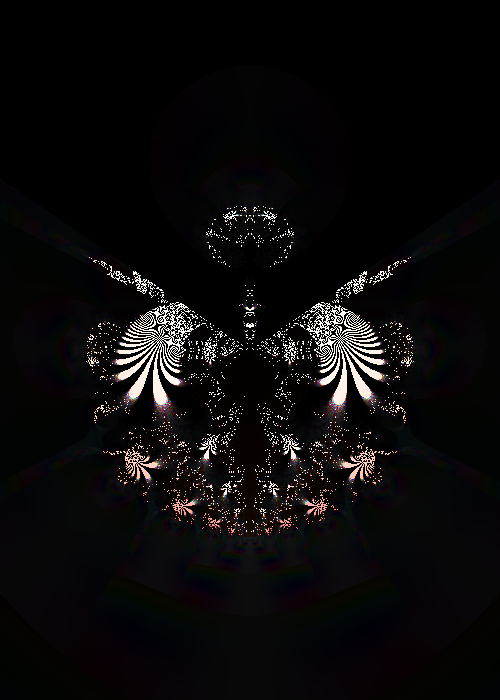

In [27]:
""" number 2 of two functions
    (using using Distance, Rotation and ET as full range H, S, V) """
t0 = time.time()
H2 = ncp.range_norm(Zd_sm)
S2 = ncp.range_norm(Zr_sm)
V2 = ncp.range_norm(ETn_sm)
I_hsv2 = ncp.normat_hsv_intrgb(H2, S2, V2, H_max=1.0, H_min=0.0, S_max=1.0, S_min=0.0, V_max=1.0, V_min=0.0)
print(time.time() - t0, '\t HSV converstion time')
display(I_hsv2)

# Color-mapped
* I_mapped = mat_to_mapped(Zd, mp)
    * Zd converted to index of unique values
    * mp will be resized to number of unique values in Zd

1.616454839706421 	 HSV converstion time


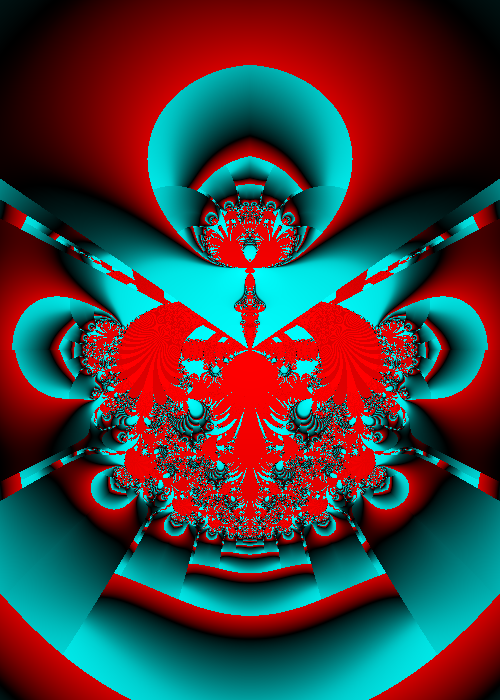

In [28]:
""" Color map example: Red to Black to Blue-Green """
t0 = time.time()
mp = np.array([[1.0, 0.0, 0.0],[0.0, 0.0, 0.0],[0.0, 1.0, 1.0]])
I_rgb = ncp.mat_to_mapped(Zd_sm, mp)
print(time.time() - t0, '\t HSV converstion time')
display(I_rgb)

## Interesting numerical factoid section:

ET =	 2


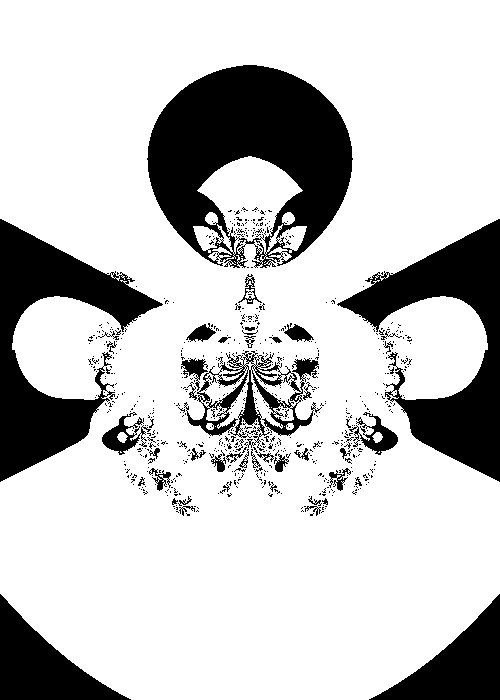

ET =	 3


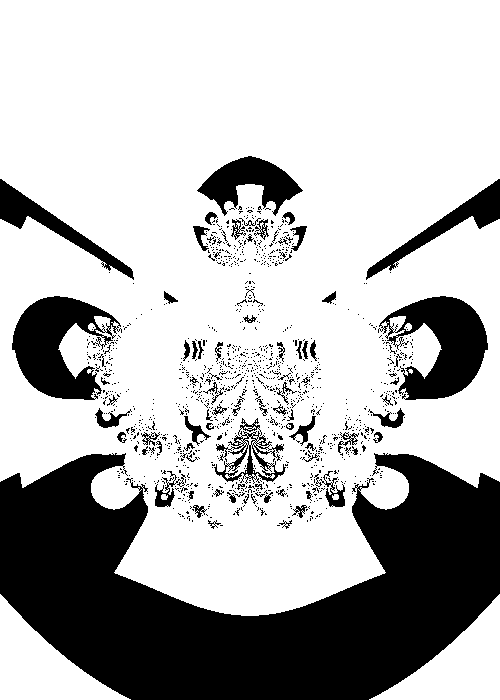

ET =	 4


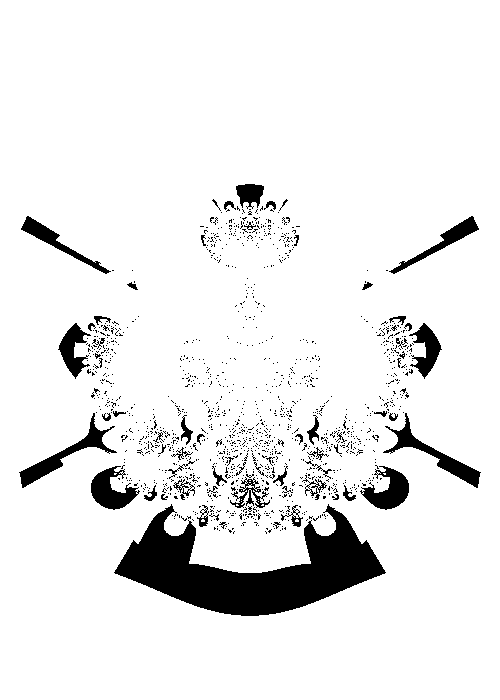

ET =	 5


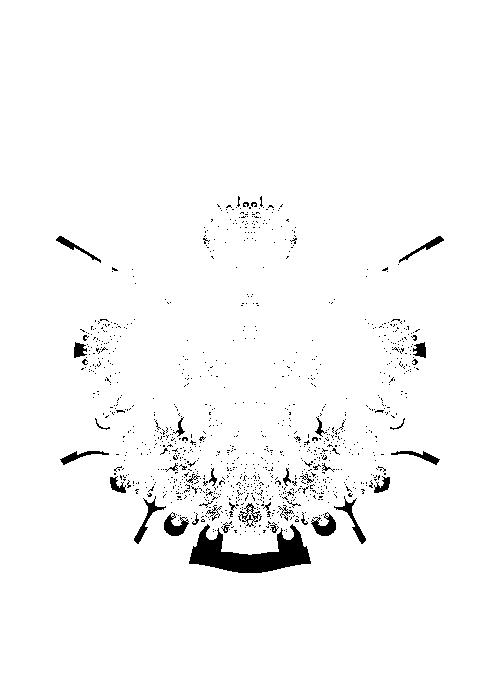

ET =	 6


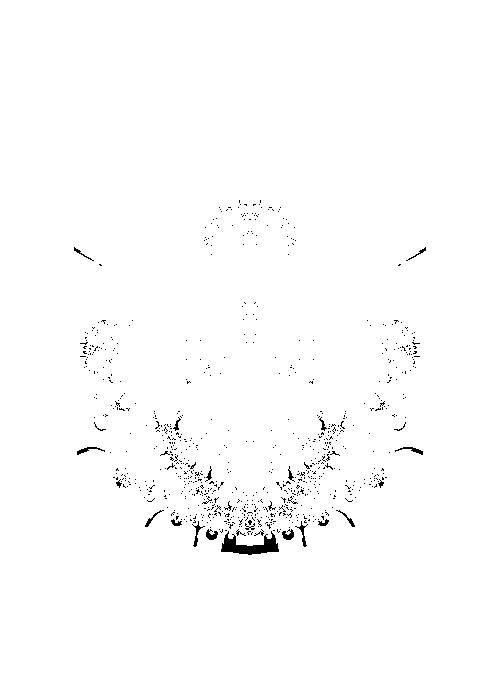

ET =	 7


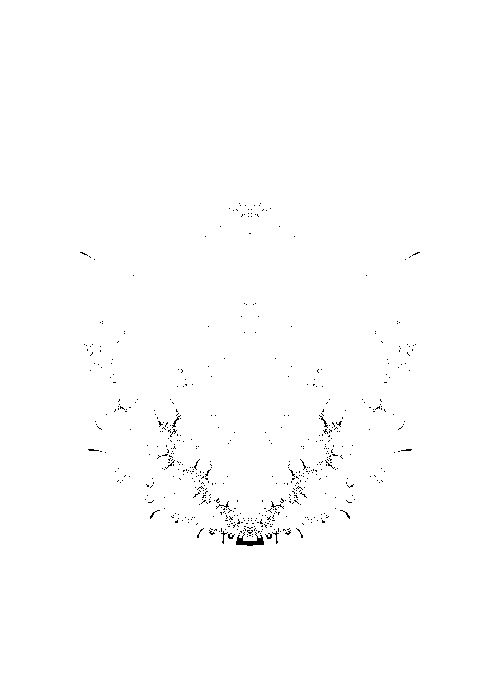

ET >	 8


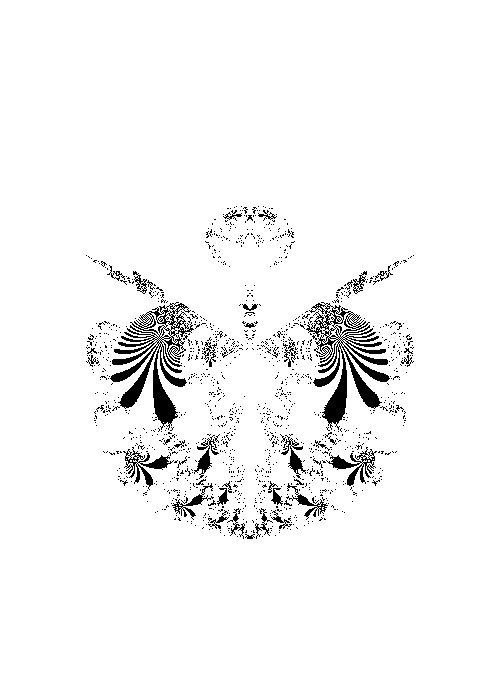

In [29]:
"""  Time-Point of Escape individual escape time points for each escape time
     Animations possible  """
lo_ET = 2
hi_ET = lo_ET + 6
for t in range(lo_ET, hi_ET):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > hi_ET] = 0
print('ET >\t',hi_ET)
display(ncp.mat_to_gray(I))

In [30]:
"""  number of points escaped at each iteration: escape time frequency  """
Total_Points = ET_sm.shape[0] * ET_sm.shape[1]
print('\t\t%i remain in orbit after %i iterations\n'%((ET_sm > (ET_sm.max()-1)).sum(),  ET_sm.max()))
print('%3s) %10s\n'%('ET', 'Escaped'))
t_esc = 0
for k in range(1,int(ET_sm.max())):
    print('%3i) %7i'%(k, (ET_sm == k).sum()))
    t_esc += (ET_sm == k).sum()

print('\n(in)Sanity check:\n%i Total points\n%i Escaped\n%i Remain'%(Total_Points, t_esc, Total_Points - t_esc))

		10375 remain in orbit after 65 iterations

 ET)    Escaped

  1)  113672
  2)   78569
  3)   99978
  4)   28330
  5)    8990
  6)    3570
  7)    1647
  8)     849
  9)     527
 10)     425
 11)     288
 12)     221
 13)     201
 14)     186
 15)     188
 16)     148
 17)     100
 18)      94
 19)     106
 20)      92
 21)      66
 22)      78
 23)      74
 24)      70
 25)      42
 26)      54
 27)      38
 28)      64
 29)      56
 30)      46
 31)      46
 32)      30
 33)      42
 34)      37
 35)      44
 36)      32
 37)      41
 38)      24
 39)      38
 40)      32
 41)      28
 42)      30
 43)      31
 44)      32
 45)      16
 46)      22
 47)      20
 48)      28
 49)      16
 50)      39
 51)      12
 52)      12
 53)      14
 54)      22
 55)      24
 56)      14
 57)      14
 58)       8
 59)      18
 60)      14
 61)      24
 62)      12
 63)      22
 64)      18

(in)Sanity check:
350000 Total points
339625 Escaped
10375 Remain


In [31]:
""" partial list of unescaped starting points (look for orbit points) """
Z_overs = Z0_sm[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

Unescaped Vector:
	V =  0.77 -174.6 degrees

    10375 total unescaped points

   points near V       (plane units)
     1971 within V/ 1  (0.770)
      338 within V/ 2  (0.385)
      252 within V/ 3  (0.257)
      188 within V/ 4  (0.192)
      116 within V/ 5  (0.154)
      103 within V/ 6  (0.128)
       92 within V/ 7  (0.110)
       77 within V/ 8  (0.096)
       65 within V/ 9  (0.086)
       58 within V/10  (0.077)
       51 within V/11  (0.070)
